# Capstone Project: King County House Price Predictions
# II. Data Storytelling

#### Miniproject Description:

Steps:
1. Ask the following questions and look for the answers using code and plots:

 1. Can you count something interesting? 
 2. Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
 3. Can you make a bar plot or a histogram?
 4. Can you compare two related quantities?
 5. Can you make a scatterplot?
 6. Can you make a time-series plot?

2. Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

3. Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Submission: Submit links to a GitHub repository containing a Jupyter Notebook. The Notebook should contain:
- The questions you asked
- The trends you investigated
- The resulting visualizations and conclusions

### Overview 
First, I will answer the 6 questions using various plots. Through those plots, I will get insights, find correlations, and make hypothesis. Finally, I will further investigate my insights and hypothesis to find a story. My data was already cleaned and stored in a file (see Data wrangling notebook for details).

In [13]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from pandas.plotting import scatter_matrix
import matplotlib.image as mpimg

In [3]:
# Load the cleaned Data
df = pd.read_csv('df_house_zipcode.csv', index_col=0)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,cost_of_living_score,diversity_score,good_for_families_score,health_fitness_score,housing_score,jobs_score,nightlife_score,outdoor_activities_score,public_schools_score,weather_score
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,2.0,4.3,3.0,4.0,2.0,2.7,3.7,4.0,3.0,3.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1.7,4.0,3.7,4.3,2.0,2.7,4.0,4.0,3.7,3.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2.0,3.7,4.0,4.3,3.0,3.3,3.7,4.0,4.3,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,2.0,3.3,4.0,4.0,2.7,3.3,3.0,4.0,3.7,3.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,2.0,3.0,4.3,4.3,3.3,3.7,2.7,4.0,4.3,2.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 44 columns):
id                          21597 non-null int64
date                        21597 non-null object
price                       21597 non-null float64
bedrooms                    21597 non-null int64
bathrooms                   21597 non-null float64
sqft_living                 21597 non-null int64
sqft_lot                    21597 non-null int64
floors                      21597 non-null float64
waterfront                  21597 non-null int64
view                        21597 non-null int64
condition                   21597 non-null int64
grade                       21597 non-null int64
sqft_above                  21597 non-null int64
sqft_basement               21597 non-null int64
yr_built                    21597 non-null int64
yr_renovated                21597 non-null int64
zipcode                     21597 non-null int64
lat                         21597 non-null float64


The features up to sales_order are house related ones from the main dataset and the features from commute_grade are zipcode features scrapped from Niche.com using zipcode (see the data wrangling notebook for more details). 

In [6]:
# Change data types
df.id = df.id.astype(str)
df.zipcode = df.zipcode.astype(str)
df.date = pd.to_datetime(df.date)

In [7]:
type(df.id[0]), type(df.zipcode[0]), type(df.date[0]),

(str, str, pandas._libs.tslib.Timestamp)

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,cost_of_living_score,diversity_score,good_for_families_score,health_fitness_score,housing_score,jobs_score,nightlife_score,outdoor_activities_score,public_schools_score,weather_score
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402029e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,...,1.862439,3.653887,3.776344,4.201894,2.329837,3.009668,3.670033,4.047178,3.702496,2.832296
std,3.671337e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,...,0.174469,0.496031,0.470023,0.159727,0.423887,0.434868,0.497565,0.176452,0.569804,0.342803
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1.700000,2.700000,2.700000,3.300000,1.300000,2.000000,1.700000,3.000000,2.300000,1.700000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1.700000,3.300000,3.300000,4.000000,2.000000,2.700000,3.300000,4.000000,3.300000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1.700000,3.700000,4.000000,4.300000,2.300000,3.000000,3.700000,4.000000,4.000000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,2.000000,4.000000,4.000000,4.300000,2.700000,3.300000,4.000000,4.000000,4.300000,3.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2.300000,4.300000,4.300000,4.300000,3.300000,3.700000,4.300000,4.300000,4.300000,3.000000


The dataframe wrangled in the previous notebook is now loaded exactly as it was. 

### Univariate analysis

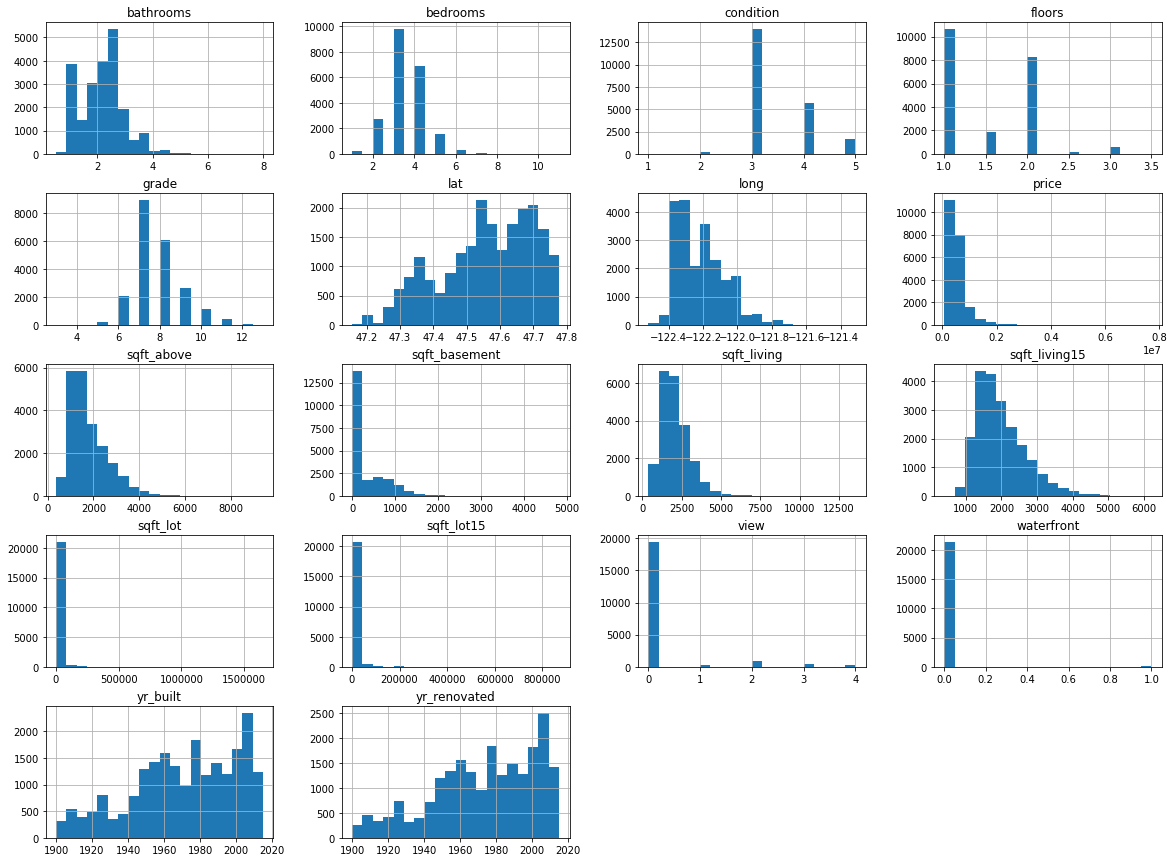

In [264]:
# matplotlib histogram
df.iloc[:,:21].hist(bins=20, figsize=(20,15))
plt.show()

I looked into histograms of all house features (excluding zipcode features). Some histograms show a count of each possible value if a feature has only a few possible values (e.g., bedrooms, bathrooms, grade, etc). The main feature of interest is the column named 'price' which represents house prices in King County between May 2014 and May 2015. I will find good features that can help predicting the house prices.

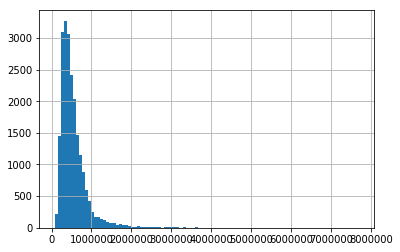

In [10]:
# histogram
df.price.hist(bins=100)
plt.show()

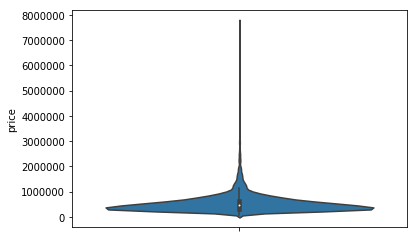

In [29]:
# violin plot
sns.violinplot(y=df.price)
plt.show()

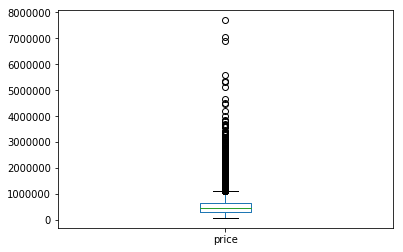

In [72]:
# box plot
df.price.plot(kind='box')
plt.show()

All these plots show the distribution of house prices. The house price is highly skewed to the right. There are also many other right-skewed features such as bedrooms, bathrooms, square footage related features starting with 'sqft_'. These are all likely to be positively correlated with house prices. Now I will look into relationships between features.

### Bivariate analysis

Scatter plots are drawn to see the overall relationships between features. 

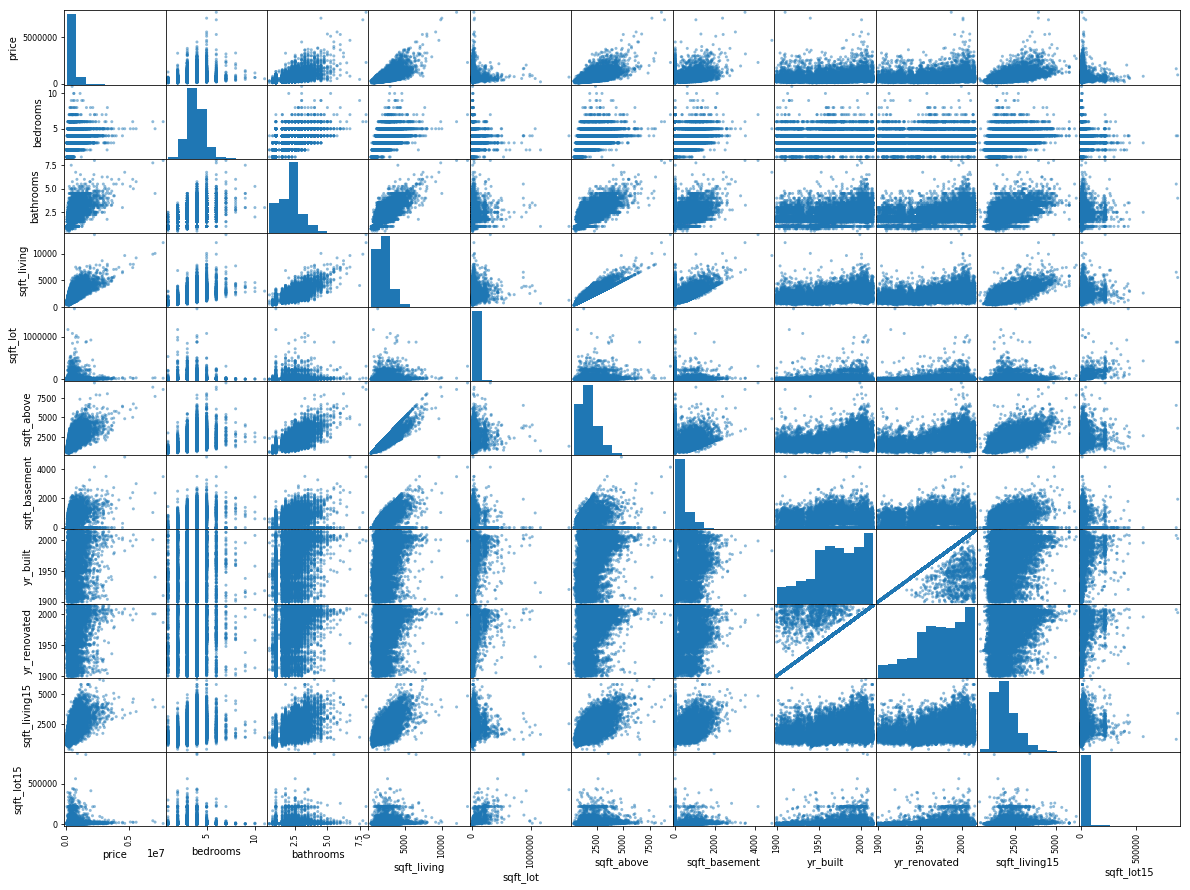

In [265]:
columns_for_scatter =['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                      'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
                      'sqft_living15', 'sqft_lot15']
scatter_matrix(df[columns_for_scatter], figsize = (20,15))
plt.show()

Since there are so many columns, I omitted the columns with a few possible values. I will investigate those columns later using different plots. The first row shows that many features (e.g., bathrooms and sqft_living) are correlated with house prices. Some variables other than price are also correlated with each other. I will further check their correlations using the correlation coefficient below.

In [266]:
# Correlation matrix
corr_matrix = df[columns_for_scatter].corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.315960,0.525905,0.701909,0.089882,0.605371,0.323776,0.053984,0.105734,0.585247,0.082837
bedrooms,0.315960,1.000000,0.527874,0.593182,0.033606,0.492549,0.309244,0.160748,0.172360,0.404540,0.031898
bathrooms,0.525905,0.527874,1.000000,0.755758,0.088373,0.686668,0.283440,0.507173,0.538272,0.569884,0.088303
sqft_living,0.701909,0.593182,0.755758,1.000000,0.173453,0.876448,0.435130,0.318152,0.343832,0.756402,0.184342
sqft_lot,0.089882,0.033606,0.088373,0.173453,1.000000,0.184139,0.015418,0.052946,0.052788,0.144763,0.718204
sqft_above,0.605371,0.492549,0.686668,0.876448,0.184139,1.000000,-0.052156,0.424037,0.436028,0.731767,0.195077
sqft_basement,0.323776,0.309244,0.283440,0.435130,0.015418,-0.052156,1.000000,-0.133064,-0.102227,0.200443,0.017550
yr_built,0.053984,0.160748,0.507173,0.318152,0.052946,0.424037,-0.133064,1.000000,0.909871,0.326377,0.070777
yr_renovated,0.105734,0.172360,0.538272,0.343832,0.052788,0.436028,-0.102227,0.909871,1.000000,0.324714,0.070062
sqft_living15,0.585247,0.404540,0.569884,0.756402,0.144763,0.731767,0.200443,0.326377,0.324714,1.000000,0.183515


This correlation matrix can be represented as a heat map which helps detections of low and high correlations.

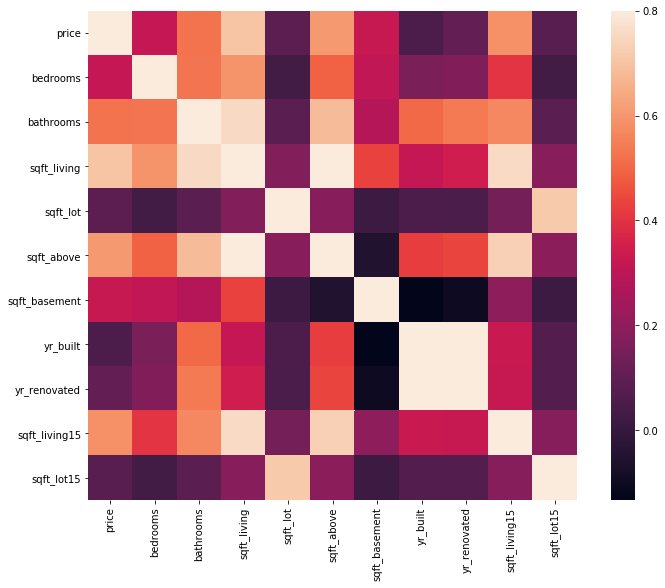

In [268]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
plt.show()

The brighter box means the two features intersecting in the box are highly correlated. Too high correlation coefficient between two predictors (independent variables) used in the same model can introduce multicolinearity. For example, sqft_above and sqfr_living has a very bright box (correlation=.88). These will have to be carefully taken care of when building a model. However, here I will focuse on the main feature of interest. Below are the correlation coefficients between price and all other features in descending order. 

In [269]:
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701909
sqft_above       0.605371
sqft_living15    0.585247
bathrooms        0.525905
sqft_basement    0.323776
bedrooms         0.315960
yr_renovated     0.105734
sqft_lot         0.089882
sqft_lot15       0.082837
yr_built         0.053984
Name: price, dtype: float64

The features related to the living area inside a house are highly or moderately correlated with price. The column sqft_living has the highest correlation to price. yr_renovated is twice more correlated to price than yr_built. Thus, yr_renovated should be included in a model if one of them has to be dropped due to multicolinearity. Anyway both of them are very weakly correlated with house prices and I wonder why. Thus, I will investigate the relationship between house prices and renovated years further. Note that in the raw data 96% of renovated years were missing, so they were filled with built years.

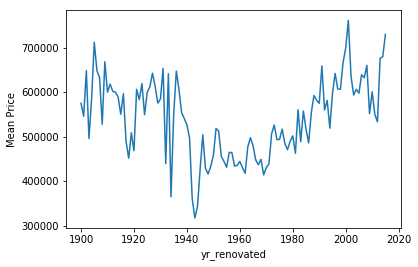

In [372]:
# mean prices as a function of year renovated
df.groupby('yr_renovated')['price'].mean().plot()
plt.ylabel('Mean Price')
plt.show()

There are a lot of fluctuations year to year. If those fluctuations are ignored, we can see the overall v-shape pattern. In ther words, the median house prices tend to go down as houses get older from 2015 to 1960, but the prices tend to go back up as they get even more older from around 1960 to 1900. Now I found out why house prices are weakly correlated with built years, but still wonder what makes this pattern. Thus, more features are plotted as a function of year built.

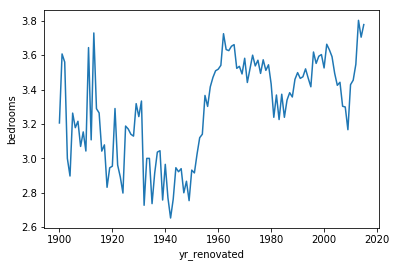

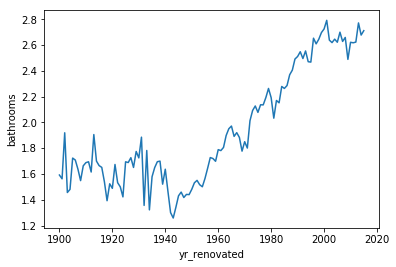

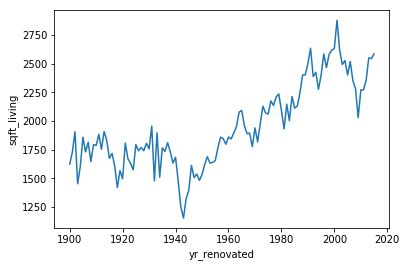

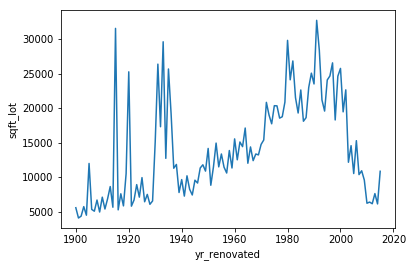

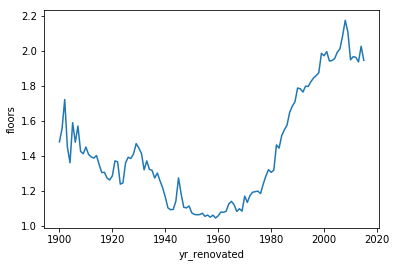

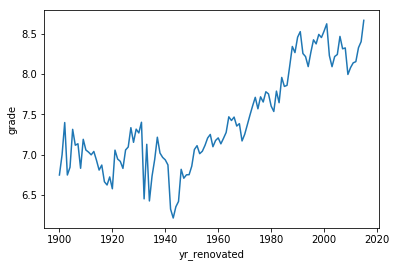

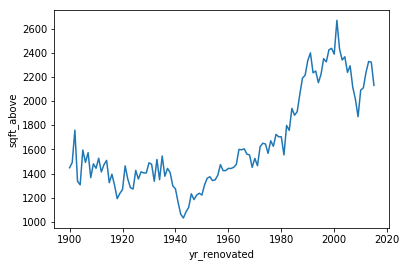

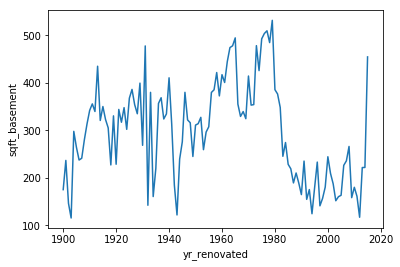

In [300]:
for column in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'grade','sqft_above', 'sqft_basement']:
    df.groupby('yr_renovated')[column].mean().plot()
    plt.ylabel(column)
    plt.show()

I found similar v-shape patterns in many features including floors, but the patterns were more likely a check mark instead of V. It seems houses built before 1950 have reasons to be still around without getting rebuilt.

It is time to investigate relationships between price and the features with a few levels of values. Some features such as  'bedrooms' and 'bathrooms'are included here again since they have small enough levels of values for box plots.

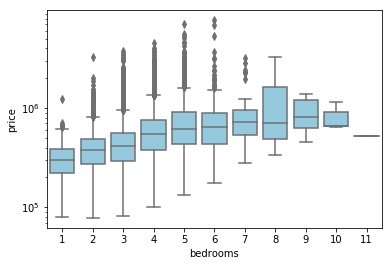

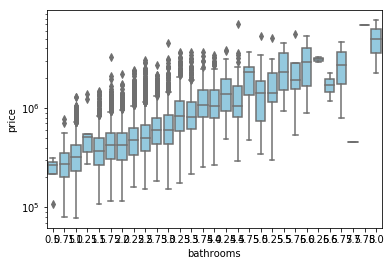

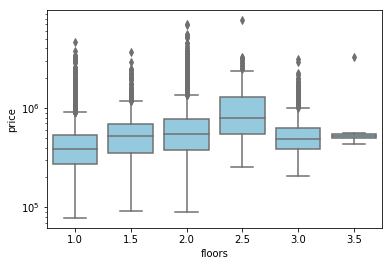

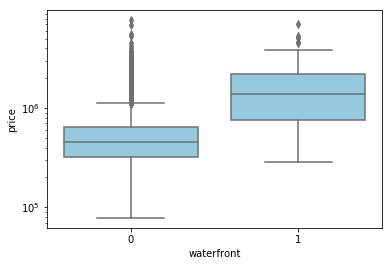

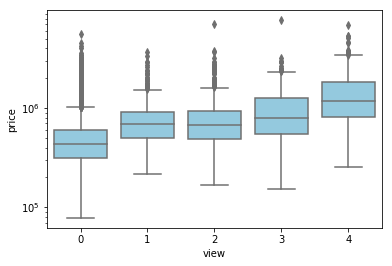

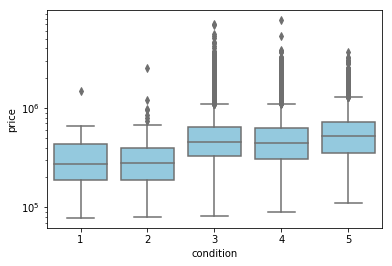

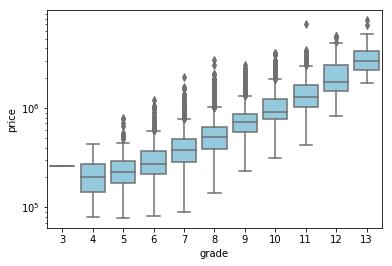

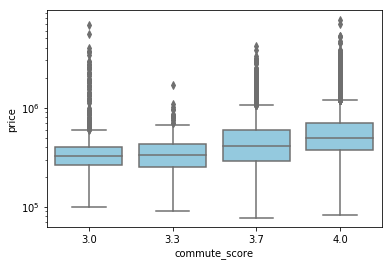

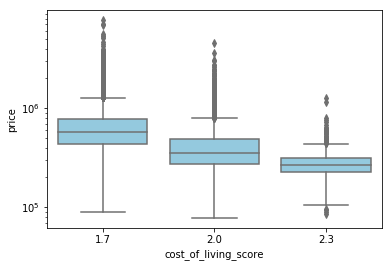

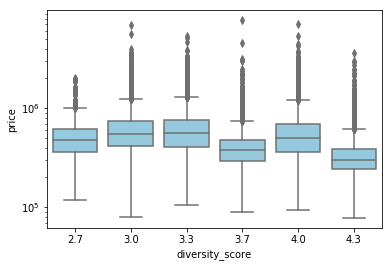

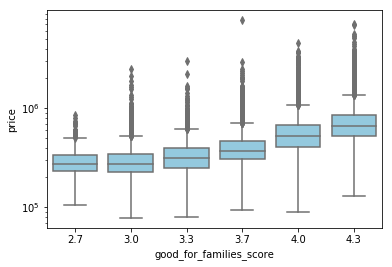

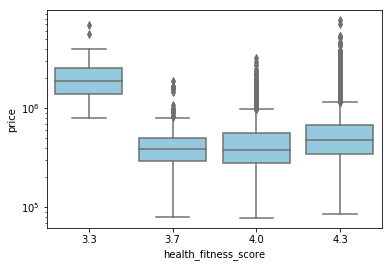

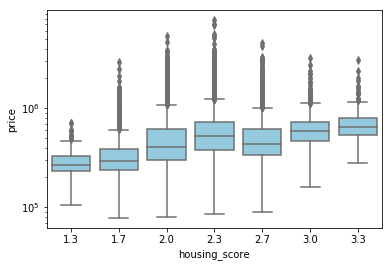

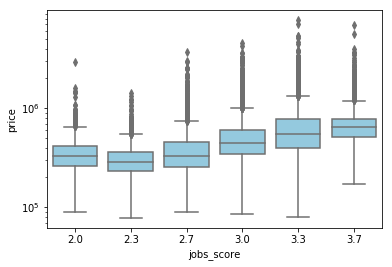

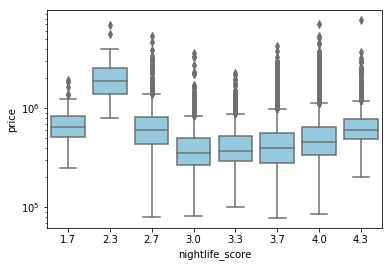

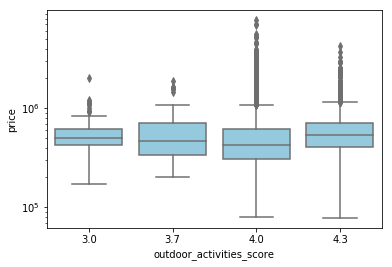

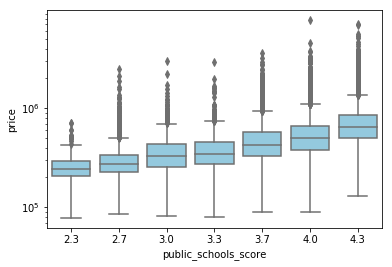

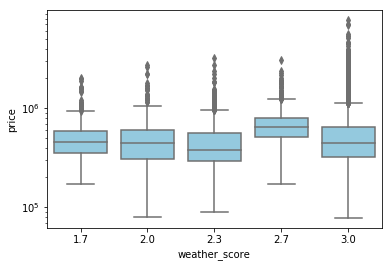

In [301]:
# Price box plots with discrete features on x-axis 
columns_discrete = ['bedrooms','bathrooms','floors', 'waterfront', 
                    'view', 'condition', 'grade',
                    'commute_score', 'cost_of_living_score', 
                    'diversity_score', 'good_for_families_score', 
                    'health_fitness_score', 'housing_score', 'jobs_score',
                    'nightlife_score', 'outdoor_activities_score', 
                    'public_schools_score', 'weather_score']
for column in columns_discrete:
    g = sns.boxplot(x=column, y='price', data = df, color="skyblue")
    g.set_yscale('log') #needed this due to skewed prices
    plt.show()

Since house prices were extremely right-skewed, y-axis (price) was log scaled to see the differences between side-by-side boxes better. The boxes of many features are monotonic increasing or decreasing. Thus, these features could become good predictors in the prediction of house prices. 'grade', 'bathrooms','good_for_families_score', and 'public_schools_score' are particularly showing stable monotonic relationships with house prices. This finding is confirmed below by correlation coefficients. Some of the features are not monotonic, but show distinct differences in prices between different levels. For example, houses with the lowest level of health_fitness_score have much higher house prices than houses with other levels. In machine learning, this kind of features would be better to be used with one hot encoding to treat them as a categorical variable without order.

In [302]:
# Correlations with price
corr_matrix_disc = df[['price']+columns_discrete].corr()
corr_matrix_disc['price'].sort_values(ascending=False)

price                       1.000000
grade                       0.667922
bathrooms                   0.525905
good_for_families_score     0.454418
public_schools_score        0.411547
view                        0.397318
jobs_score                  0.331647
bedrooms                    0.315960
waterfront                  0.266437
floors                      0.256814
commute_score               0.168691
housing_score               0.155732
health_fitness_score        0.088650
weather_score               0.063249
outdoor_activities_score    0.047585
condition                   0.036025
nightlife_score            -0.003632
diversity_score            -0.197816
cost_of_living_score       -0.384407
Name: price, dtype: float64

### Time-series analysis

Time series analysis was made using house price and dates sold.  

In [68]:
#Counter(df.date)

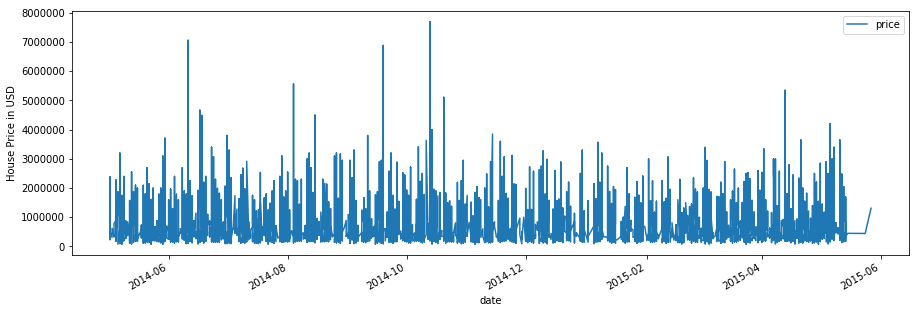

In [306]:
# all house prices ordered by sold dates
df[['date','price']].set_index('date').plot(figsize=(15,5))
plt.ylabel('House Price in USD')
#plt.yscale('log') # this doesn't help
plt.show()

The above graph shows house prices of all sales. It is hard to find any pattern due to too many values, so I will use aggregated values below. Median was used for aggregation since median is less affected by outliers than mean. 

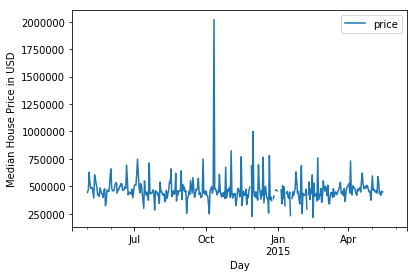

In [310]:
# Resample prices by day using median
df[['date','price']].set_index('date').resample('D').median().plot()
# plt.yscale('log') # this doesn't help
plt.xlabel('Day')
plt.ylabel('Median House Price in USD')
plt.show()

It is still hard to the pattern. Log scaling y-axis does not help. Thus, I will use aggregated prices for longer periods (week and month).

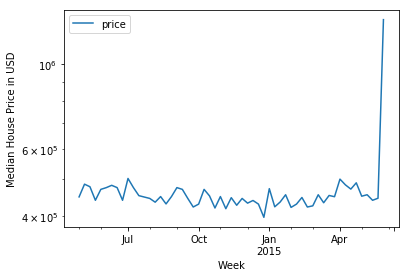

In [312]:
# Resample prices by week using median
df[['date','price']].set_index('date').resample('W').median().plot()
# plt.yscale('log') # this doesn't help
plt.xlabel('Week')
plt.ylabel('Median House Price in USD')
plt.show()

In [42]:
df[['date','price']].set_index('date').resample('W').median().iloc[-1]

price    1310000.0
Name: 2015-05-31 00:00:00, dtype: float64

In [43]:
df[['date','price']].set_index('date').resample('W').count().iloc[-1]

price    1
Name: 2015-05-31 00:00:00, dtype: int64

The extreme outliers are usually not shown in those median graphs, but there was only 1 observation int the very last week and it was a extremely high house price. Since the extrem price prevented the overall pattern from being shown and log scaling y-axis does not help., I omitted the price in the below graph.   

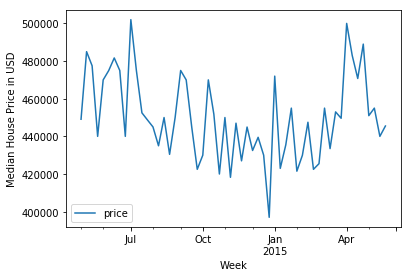

In [313]:
# Resample prices by week using median (one outlier omitted)
df[['date','price']].set_index('date').resample('W').median()[:-1].plot() # last price removed
plt.xlabel('Week')
plt.ylabel('Median House Price in USD')
plt.show()

Now the graph starts showing a v-shape pattern. By ignoring the fluctuations, I can see the price goes down from May to January and then goes back up till April (or May)

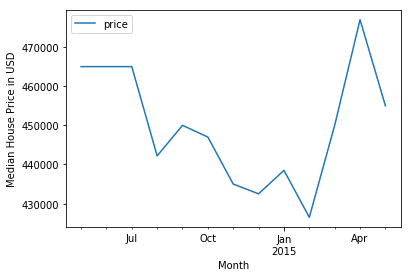

In [45]:
# Resample prices by month using median
df[['date','price']].set_index('date').resample('M').median().plot()
plt.xlabel('Month')
plt.ylabel('Median House Price in USD')
plt.show()

The pattern I saw above is more clear when monthly median prices are used.

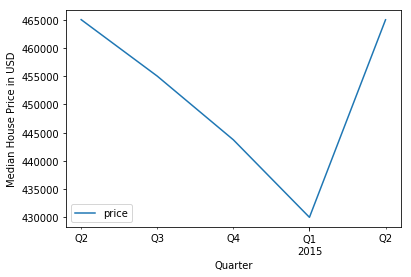

In [318]:
# Resample prices by quarter using median
df[['date','price']].set_index('date').resample('3M').median().plot()
plt.xlabel('Quarter')
plt.ylabel('Median House Price in USD')
plt.show()

The quarterly aggreated median prices show an exact v-shape pattern.

### Multivariate analysis

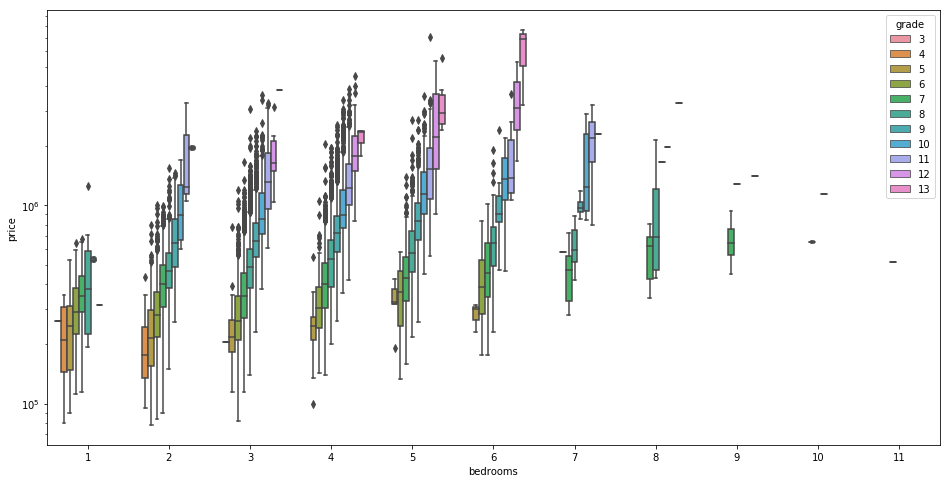

In [343]:
# Box plots of Price for each bedroom count and house grade  
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='bedrooms', y='price', hue='grade',#showfliers=False,
            data=df)
ax.set_yscale('log') #needed this due to skewed prices
plt.show()

This mutivariate box plot consists of price boxes for each bedroom count and house grade. This shows (1) how prices go up as the number of bedrooms increases and (2) how prices go up as house grade increases for each bedroom count. This plot shows house grade explains extra variabilities in house prices not explained by the number of bedrooms. Thus, they together will be good predictors in a model predicting house prices. Another interesting pattern I found here is as the house price does not keep going up as the number bedrooms increases. After around 6 bedrooms, prices tend to go down as the bedroom count increases since high grade houses disappear.

### Analysis using latitude and longitude

In [363]:
# minimum and maximum longitude and latitude (need these to crop the map area I need)
long_lat_min_max =[min(df.long), max(df.long), min(df.lat), max(df.lat)]
long_lat_min_max

[-122.519, -121.315, 47.1559, 47.7776]

The map image 'King_County_map.png' was cropped from OpenStreetMap using above latitude and longitude. Link:  https://www.openstreetmap.org/export#map=9/47.4709/-121.9175

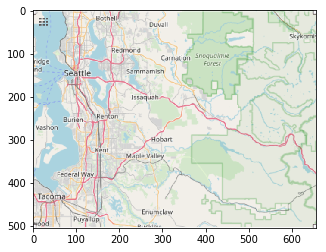

In [361]:
King_County_map = mpimg.imread('King_County_map.png')
plt.imshow(King_County_map)
plt.show()

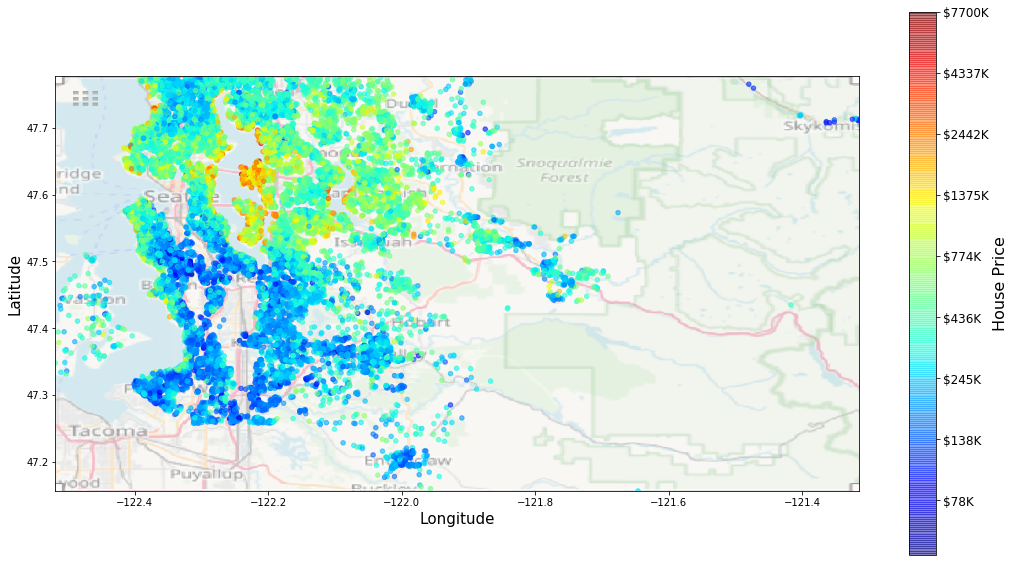

In [364]:
# load the map
King_County_map = mpimg.imread('King_County_map.png')

# scatter plot of longitude and latitude colored with price
ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' '], label=' ', # used for dot size
    c=np.log(df.price), cmap=plt.get_cmap('jet'), colorbar=False,
    figsize=(18,10), sharex=False)

# show the map image with correct longitude and latitude
plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

# need a separate colorbar due to log scaled prices
cbar = plt.colorbar()
ticks = np.linspace(np.log(df.price).min(), np.log(df.price).max(), 9)
ticks_label = ["$%dK"%(np.exp(v)/1000) for v in ticks]
#cbar.ax.set_yticks(ticks)
cbar.ax.set_yticklabels(ticks_label, fontsize=12)
cbar.set_label('House Price', fontsize=16)

plt.show()

This graph shows where how house prices are distributed on the map. I had to log-scale house prices since otherwise the dots are all blue with a few red dots due to right-skewed house prices. This graph shows houses near Lake Washington (the largest lake on the map) and east and west sides of the lake tend to be more expensive than other areas. It also shows that the extremely expensisve houses are on the waterfront.

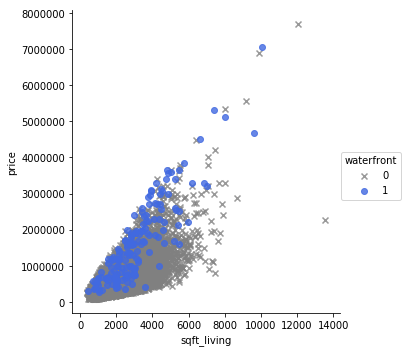

In [263]:
# sqft_living vs price scatter plot colored with waterfront 
sns.lmplot(data = df, x='sqft_living', y='price', hue='waterfront', hue_order=[0,1],
           fit_reg=False, markers=["x", "o"], palette={1:"royalblue", 0:"grey"})
plt.show()

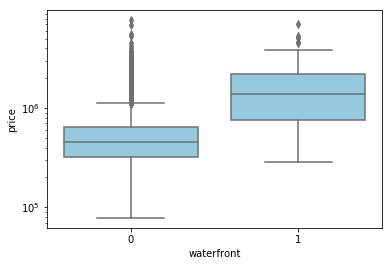

In [373]:
g = sns.boxplot(x='waterfront', y='price', data = df, color="skyblue")
g.set_yscale('log') #needed this due to skewed prices
plt.show()

The scatter plot and box plot show houses on the waterfront (blue circles) indeed tend to be more expensive.

Zipcode features that are the most correlated with prices were found to be good_for_families_score and public_schools_score. Thus, I colored the dots with those scores to see if a similar pattern can be found.

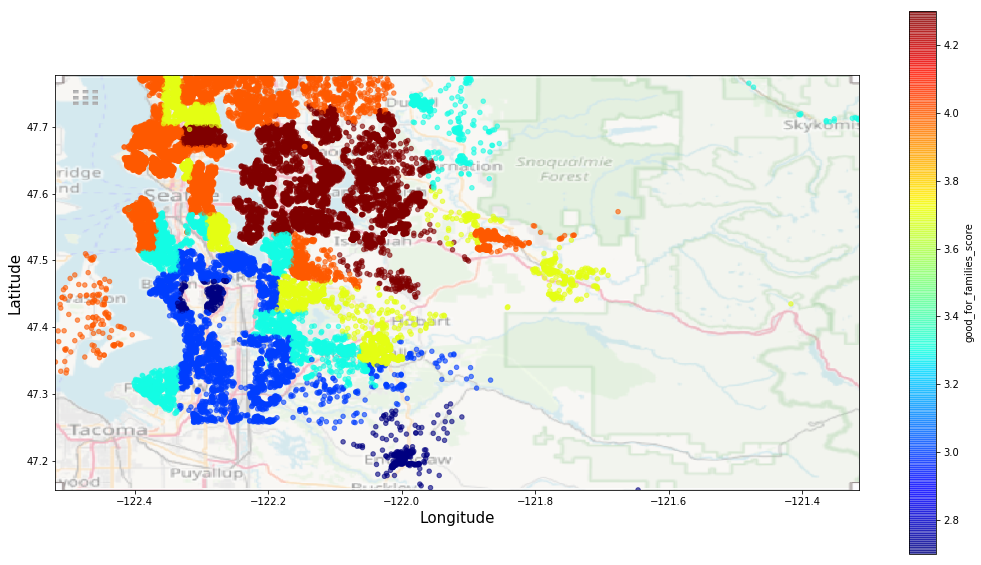

In [365]:
# colored with good_for_families_score

ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' ']/100, label=' ', 
    c='good_for_families_score', cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(18,10), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.show()

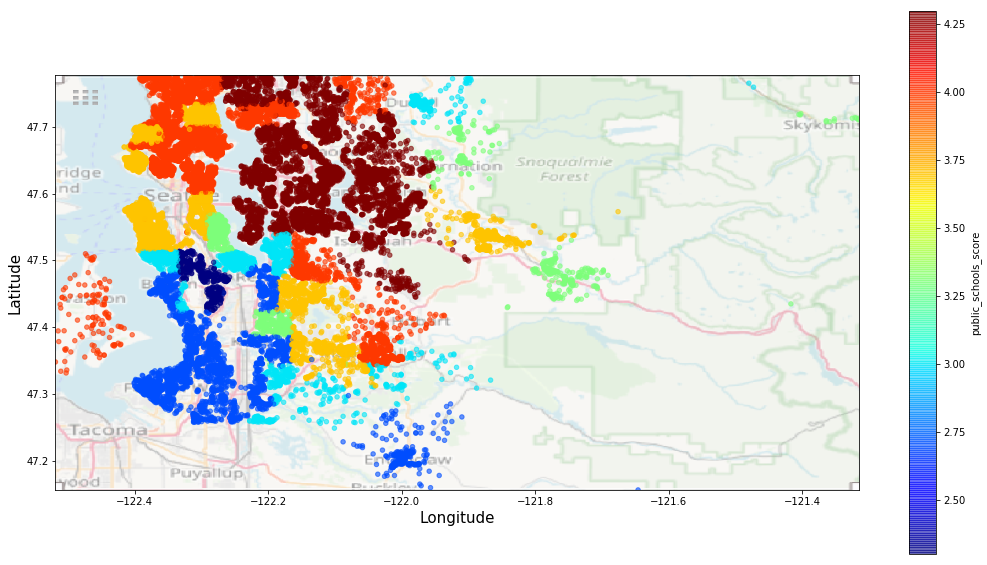

In [355]:
# colored with public_schools_score

ax = df.plot(kind='scatter', x='long', y='lat', alpha=0.6,
    #s=df[' ']/100, label=' ', 
    c='public_schools_score', cmap=plt.get_cmap('jet'), colorbar=True,
    figsize=(18,10), sharex=False)

plt.imshow(King_County_map,  alpha=.5, extent=long_lat_min_max,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=15)
plt.xlabel("Longitude", fontsize=15)

plt.show()

Note that these zipcode features were scrapped using zipcode, so these graphs cannot show different scores within the same zipcode. However, they still show similar color patterns, more red houses on the west and east of Lake Washington and blue houses below the lake. Thus, these features like good_for_families_score and public_schools_score could become a good predictor for house prices.  

## Insights and hypothesis

Insights I had and answered

- Price vs. Year built
- Median price vs. dates sold
-

## Storytelling and Conclusion